<a href="https://colab.research.google.com/github/dharace/COMP8730_Assign02_hirpara3/blob/main/NLP_AS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
!pip install pytrec_eval
import pytrec_eval

import nltk
from nltk.corpus import brown
from nltk.util import ngrams 
from nltk import bigrams, trigrams

nltk.download('brown')

from collections import Counter, defaultdict
import re

import collections
from nltk import word_tokenize

from operator import itemgetter
import matplotlib.pyplot as plt

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [220]:
FILE_PATH = '/content/sample_data/sentences.txt'

with open(FILE_PATH, mode='r', encoding='utf8') as in_f:
      lines = in_f.readlines()

listOfSentences = [i.split("*") for i in lines]
listOfSentences = [i[0].split() for i in listOfSentences]

listOfIncompleteSentence = [i[2:4] for i in listOfSentences]
listOfCorrectWords = [i[1] for i in listOfSentences]

print(listOfIncompleteSentence)
print(listOfCorrectWords)


[['I', 'felt'], ['at'], ['when', 'the'], ['in', 'the'], ['I', 'thought'], ['everything'], ['when', 'I'], ['and', 'saw'], ['and', 'saw'], ['I', 'was'], ['I'], ['through', 'the'], ['the', 'hunters'], ['they', 'kill'], ['make', 'a'], ['to', 'tidy'], ['the', 'wind'], ['Mr', 'J.'], ['garden', 'full'], ['talk', 'to'], ['they', 'throw'], ['an'], ['after', 'the'], ['the', 'birds'], ['making', 'any'], ['bring', 'it'], ['this'], ['a', 'man'], ['an'], ['they'], ['a'], ['this'], ['they', 'make'], ['the', 'animals'], ['the'], ['they', 'throw'], ['they'], ['three'], ['it', 'was'], ['I', 'saw'], ['could', 'do'], ['blood', 'was'], ['you', 'have'], ['you', 'can'], [], ['out', 'from'], ['for', 'controlling'], ['friendly', 'with'], ['the'], ['to', 'make'], ['hit', 'him'], ['they'], ['transport', 'is'], ['they', 'have'], ['a', 'plastic'], ['the'], ['a'], ['to'], ['on', 'and'], ['if', 'you'], ['a'], ['all', 'of'], ['went', 'up'], ['with'], ['so', 'I'], ['I', 'made'], ['I', 'was'], [], ['one', 'of'], ['foun

In [179]:
words_news=brown.words(categories=["news"])
print(words_news)

model = defaultdict(lambda: defaultdict(lambda: 0))
print(model)

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

#normalizinging the frequency of co-occurence 
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
defaultdict(<function <lambda> at 0x7f5d2bfa6950>, {})


In [194]:
# dict1 = dict(model["make","a"])
# print(dict1)

dict1 = {'the': 0.2857142857142857, 'a': 0.14285714285714285, 'full': 0.07142857142857142, 'failing': 0.07142857142857142, 'as': 0.07142857142857142, 'to': 0.07142857142857142, 'overwhelming': 0.07142857142857142, 'that': 0.07142857142857142, 'incorporation': 0.07142857142857142, 'often': 0.07142857142857142}

dict1 = {key: rank for rank, key in enumerate(sorted(dict1, key=dict1.get, reverse=True), 1)}

lista = [x for x in dict1.keys()]
print(lista)

['the', 'a', 'full', 'failing', 'as', 'to', 'overwhelming', 'that', 'incorporation', 'often']


In [181]:
list_of_ngrams = []
for i in ([1,2,3,5,10]):
    ng = ngrams(brown.words(),i)
    list_of_ngrams.append(ng)

In [182]:
# ngram model
model_ngram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in model_ngram:
    for w1 in ngrams(model_ngram,1, pad_right=True, pad_left=True):
        model_ngram[(w1, w2)][w3] += 1
        
#normalizinging the frequency of co-occurence 
for w1_w2 in model_ngram:
    total_count = float(sum(model_ngram[w1_w2].values()))
    for w3 in model_ngram[w1_w2]:
        model_ngram[w1_w2][w3] /= total_count


In [183]:
#bigram model

model_bigram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
        model_bigram[(w1)][w3] += 1
        
#normalizinging the frequency of co-occurence 
for w1_w2 in model_bigram:
    total_count = float(sum(model_bigram[w1_w2].values()))
    for w3 in model_bigram[w1_w2]:
        model_bigram[w1_w2][w3] /= total_count


In [184]:
model_trigram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model_trigram[(w1, w2)][w3] += 1
        
#normalizinging the frequency of co-occurence 
for w1_w2 in model_trigram:
    total_count = float(sum(model_trigram[w1_w2].values()))
    for w3 in model_trigram[w1_w2]:
        model_trigram[w1_w2][w3] /= total_count

In [185]:
model_fivegram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3, w4,w5 in ngrams(sentence, 5, pad_right=True, pad_left=True):
        model_fivegram[(w1,w2, w3, w4)][w5] += 1
        
#normalizinging the frequency of co-occurence 
for w1_w2 in model_fivegram:
    total_count = float(sum(model_fivegram[w1_w2].values()))
    for w3 in model_fivegram[w1_w2]:
        model_fivegram[w1_w2][w3] /= total_count

In [186]:
model_tengram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3, w4,w5, w6, w7, w8,w9, w10 in ngrams(sentence, 10, pad_right=True, pad_left=True):
        model_tengram[(w1,w2, w3, w4,w5, w6, w7, w8,w9,)][w10] += 1
        
#normalizinging the frequency of co-occurence 
for w1_w2 in model_tengram:
    total_count = float(sum(model_tengram[w1_w2].values()))
    for w10 in model_tengram[w1_w2]:
        model_tengram[w1_w2][w10] /= total_count

In [228]:
len(listOfSentences)
print(listOfSentences)


def funcA(sentences, model):
    listOfDicts = []
    for sentence in sentences:
        l = []
        dict2 = {}
        text = sentence
        text_length_initial = len(text)
        res = dict(sorted(model[tuple(text[-text_length_initial:])].items(), key = itemgetter(1), reverse = True)[:10])
        lista = [x for x in res.keys()]
        listOfDicts.append(lista) 
    return(listOfDicts)

[['strang', 'strange', 'I', 'felt', 'very'], ['brake', 'break', 'at'], ['brack', 'break', 'when', 'the'], ['weanter', 'winter', 'in', 'the'], ['gost', 'ghost', 'I', 'thought', 'it', 'was', 'a'], ['expect', 'except', 'everything'], ['steped', 'stepped', 'when', 'I', 'first'], ['streagh', 'strange', 'and', 'saw'], ['colow', 'coloured', 'and', 'saw', 'streagh'], ['exclation', 'escalator', 'I', 'was', 'on', 'an'], ['noicey', 'noticed', 'I'], ['fance', 'fence', 'through', 'the'], ['kille', 'kill', 'the', 'hunters'], ['nerrow', 'arrow', 'they', 'kill', 'birds', 'with', 'their'], ['depe', 'deep', 'make', 'a'], ['gardon', 'garden', 'to', 'tidy', 'up', 'his'], ['belu', 'blew', 'the', 'wind'], ['angray', 'angry', 'Mr', 'J.', 'was', 'very'], ['leavs', 'leaves', 'garden', 'full', 'of'], ['manger', 'manager', 'talk', 'to', 'the'], ['aero', 'arrow', 'they', 'throw', 'a'], ['ansion', 'ancient', 'an'], ['dear', 'deer', 'after', 'the'], ['flu', 'flew', 'the', 'birds'], ['noice', 'noise', 'making', 'any

In [229]:
list_of_predicted_model = []
models = [model_ngram, model_bigram, model_trigram, model_fivegram, model_tengram]
for model in models:
    list_of_predicted_model.append(funcA(listOfIncompleteSentence, model))

len(list_of_predicted_model[0])

198

In [236]:
qrel = listOfCorrectWords
run = listOfDicts

def s_at_k(correct_words, predicted_words, k=[1, 5, 10]):
    count = []
    for i in range(198):
        words_candidate = predicted_words[i]
        correct_word = correct_words[i]
        for j in k:
            if correct_word in words_candidate[:j]:
                count.append(1)
            else:
                count.append(0)
                pass
    return(sum(count) / len(count))
    

In [231]:
meansModelsK1 = []
for i in range(5):
    meansModelsK1.append(s_at_k(listOfCorrectWords, list_of_predicted_model[i],k=[1, ]))
print(meansModelsK1)

[0.0, 0.0, 0.015151515151515152, 0.0, 0.0]


In [232]:
meansModelsK5 = []
for i in range(5):
    meansModelsK5.append(s_at_k(listOfCorrectWords, list_of_predicted_model[i],k=[5]))
print(meansModelsK5)

[0.0, 0.0, 0.015151515151515152, 0.0, 0.0]


In [233]:
meansModelsK10 = []
for i in range(5):
    meansModelsK10.append(s_at_k(listOfCorrectWords, list_of_predicted_model[i],k=[10]))
print(meansModelsK10)

[0.0, 0.0, 0.020202020202020204, 0.0, 0.0]


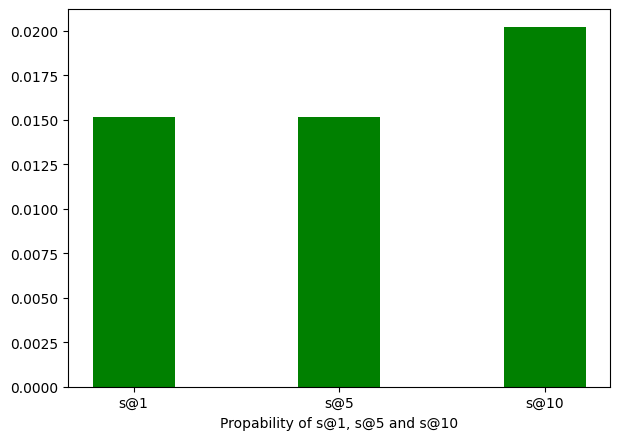

In [240]:

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

words = ["s@1", "s@5", "s@10"]
avg = [0.015151515151515152, 0.015151515151515152 ,0.020202020202020204]

plt.bar(words, avg, color ='green',
        width = 0.4)

plt.xlabel("Propability of s@1, s@5 and s@10")
plt.show()

In [235]:
for model in list_of_ngrams:
    qrel = listOfCorrectWords 
    run = listOfDicts
    evaluator = pytrec_eval.RelevanceEvaluator(
        qrel,
        {
            "success_1",
            "success_5",
            "success_10"
        },
    )

    res = evaluator.evaluate(run)
    
    # printing scores 
    successes = dict()
    for i in range(1, 11):
        successes[f"success_{i}"] = []

    for inc in res:
        tmp = res[inc]
        for i in range(1, 11):
            successes[f"success_@_{i}"].append(tmp[f"success_@_{i}"])
    
    successes = dict()
    for i in range(1, 11):
        successes[f"success_@_{i}"] = []

    for inc in res:
        tmp = res[inc]
        for i in range(1, 11):
            successes[f"success_@_{i}"].append(tmp[f"success_@_{i}"])

    import numpy as np
    for i in range(1, 11):
        print(f"average s@top-{i}: ", np.array(successes[f"success_@_{i}"]).mean())  

# Note: Error found in pytrec_eval

TypeError: ignored